# Peer-graded Assignment  Analyzing Historical Stock Revenue Data and Building a Dashboard

In [29]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Question 1: Use yfinance to Extract Stock Data

In [31]:
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max") 
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Extracting Tesla Revenue Data Using Webscraping

In [36]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text


soup=BeautifulSoup(html_data,"html.parser")

tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    tesla_revenue=tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


# Question 3: Use yfinance to Extract Stock Data

In [37]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max") 
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [48]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text


soup=BeautifulSoup(html_data,"html.parser")

gme_revenue=pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    gme_revenue=gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
gme_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


# Question 5: Plot Tesla Stock Graph

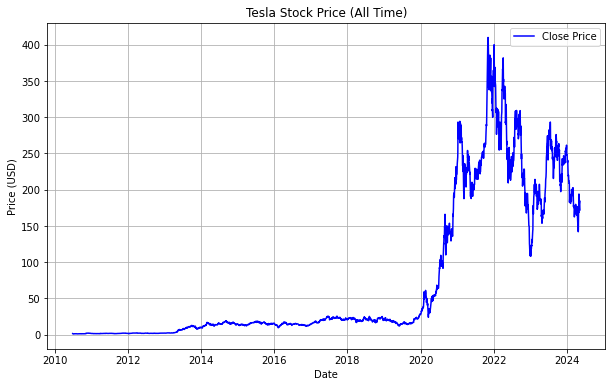

In [51]:

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


ticker_symbol = "TSLA"


tesla_data = yf.Ticker(ticker_symbol).history(period="max")  

make_graph(tesla_data, title="Tesla Stock Price (All Time)")


# Question 6: Plot GameStop Stock Graph

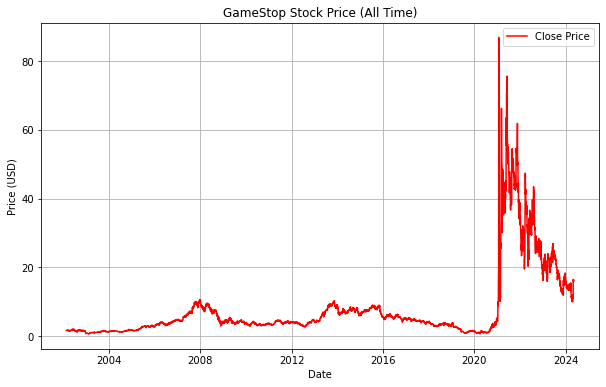

In [52]:

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Close Price', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

ticker_symbol = "GME"


gme_data = yf.Ticker(ticker_symbol).history(period="max")  


make_graph(gme_data, title="GameStop Stock Price (All Time)")
